# Correlación entre puntos

Estimador simple (Peebles & Hauser 1974):

$\xi(r) = \frac{DD}{RR}-1$

Estimador Landy & Szalay (1993):

$\xi(r) = \frac{DD - 2RD + RR}{RR}$

In [2]:
#Importamos las librerias a utilizar

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
import math as mt

## Funciones para visualización

In [3]:
def verCubo(puntos):
    '''
    DESCRIPTION: Muestra scatter de puntos de un arreglo de R3
    IN: puntos = Arreglo con N puntos en R3
    OUT: Gráfica
    '''
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(puntos.T[0], puntos.T[1], puntos.T[2], 
               marker = '.', alpha = 0.15, color = 'black')

In [4]:
def ver_correlacion(y, l, limit = [-1, 1]):
    
    '''
    DESCRIPTION: Grafica funcionde correlacion
    IN: y = array con resultados
        l = máximo tamaño de r
        limit = limites de la gráfica en y
    OUT: Gráfica 
    '''
    
    x = [(x+1)*(l/len(y)) + (l)/len(y)/2 for x in range(len(y))]
    
    plt.plot(x, y, marker = '.', color = 'black')
    plt.xlabel('r')
    plt.ylabel('$\epsilon$(r)')
    plt.title('Correlación vs Distancia')
    plt.ylim(top = max(limit), bottom= min(limit))
    plt.grid(alpha = 0.5)

In [5]:
def ver_r_cuadrada(y, l):
    
    '''
    DESCRIPTION: Grafica funcionde correlacion contra r^2
    IN: y = array con resultados
        l = máximo tamaño de r
        limit = limites de la gráfica en y
    OUT: Gráfica 
    '''
    
    x = np.array([(x+1)*(l/len(y)) + (l)/len(y)/2 for x in range(len(y))])
    
    plt.plot(x, np.array(y)*x**2, marker = '.', color = 'black')
    plt.xlabel('$r$')
    plt.ylabel('$\epsilon$(r)*$r^2$')
    plt.title('Correlación vs Distancia cuadrada')
    plt.grid(alpha = 0.5)

## Funciones auxiliares

In [6]:
def puntos(n, l = 1, dim=3, seed = 1):
    '''
    DESCRIPTION: Crea un hipercubo de lado L con n puntos con distribución unforme
    IN: n = Número de puntos
        l = Tamaño del lado (default l = 1)
        dim = dimensión del cubo (default dim = 3)
    OUT: numpy array con n puntos
    '''
    np.random.seed(seed)
    return np.random.rand(n, dim)*l

In [7]:
def n_distancia(puntos1, puntos2):
    '''
    DESCRIPTION: Calcula distancias entre todos los puntos de dos arreglos
    IN: puntos1, puntos2 = Numpy array con posiciones de los puntos, mismo tamaño
    OUT: Matriz con distancias entre puntos de arreglo1 vs arreglo2
    '''
    N = len(puntos2)
    dist = []
    
    for i in range(N):
        dist.append((np.sum(np.square(puntos2 - puntos1[i]), axis = 1))**(1/2))

        print(i)
        clear_output(wait=True)
     
    return np.array(dist)

## Funciones de correlación

In [8]:
def correlacion(datos, random, l = 1, n_bins = 15):
    
    '''
    DESCRIPTION: Estimador de Peebles & Hauser
    IN: datos = datos donde se buscará correlación
        random = datos aleatorios para comparar
        l = máxima distancia de r
        n_bins = intervalo
    OUT: Arreglo con n_bins elemntos, cada uno correspondiente
        a la correlación en ese intervalo
    '''
    
    #Creamos los bins
    bins = [(x+1)*(l)/n_bins for x in range(n_bins+1)]
    
    #Calculamos las distancias entre los datos dados
    d_distancias = n_distancia(datos, datos)
    d_distancias = np.array(d_distancias).flatten()
    #d_distancias = np.delete(d_distancias, np.where(d_distancias <= 0))
    
    #Creamos un histograma
    dd = np.array(np.histogram(d_distancias, bins = bins)[0])/2
    
    #Calculamos las distancias entre los puntos random
    r_distancias = n_distancia(random, random)
    r_distancias = np.array(r_distancias).flatten()
    #r_distancias = np.delete(r_distancias, np.where(r_distancias == 0))
    
    #Creamos un histograma
    rr = np.array(np.histogram(r_distancias, bins = bins)[0])/2
    
    #creamos correlación
    
    n_d = mt.factorial(len(datos)) / (2*(mt.factorial(len(datos)-2)))
    n_r = mt.factorial(len(random)) / (2*(mt.factorial(len(random)-2)))
    
    e = (n_r*dd)/(n_d*rr) - 1 
    
    return e

In [9]:
'''
ESTA FUNCIÓN YA NO LA USO, LA DEJO PARA REFERANCIA
'''
def quick_correlacion_LS(datos, random, l = 1, n_bins = 15):
    #Creamos los bins
    bins = [(x+1)*(l)/n_bins for x in range(n_bins+1)]
    
    #Calculamos las distancias entre los datos dados
    d_distancias = n_distancia(datos, datos)
    d_distancias = np.array(d_distancias).flatten()
    #d_distancias = np.delete(d_distancias, np.where(d_distancias == 0))
    dd = np.array(np.histogram(d_distancias, bins = bins)[0])/2
    
    #Calculamos las distancias entre los puntos random
    r_distancias = n_distancia(random, random)
    r_distancias = np.array(r_distancias).flatten()
    #r_distancias = np.delete(r_distancias, np.where(r_distancias == 0))
    rr = np.array(np.histogram(r_distancias, bins = bins)[0])/2
    
    #Calculamos las distancia entre datos+random
    rd_distancias = n_distancia(datos, random)
    rd_distancias = np.array(rd_distancias).flatten()
    #rd_distancias = np.delete(rd_distancias, np.where(rd_distancias == 0))
    rd = np.array(np.histogram(rd_distancias, bins = bins)[0])
    
    #Los numero de puntos posibles
    n_d = mt.factorial(len(datos)) / (2*mt.factorial(len(datos)-2))
    n_r = mt.factorial(len(random)) / (2*mt.factorial(len(random)-2))
    n_rd = len(random)*len(datos)
                                                   
    #creamos la correlación de Landy-Szalay
    e = (dd/n_d - 2*rd/n_rd + rr/n_r) / (rr/n_r)
    
    return e

In [10]:
def long_correlacion_LS(datos, random, l = 1, n_bins = 15):
    
    '''
    DESCRIPTION: Estimador de Landy & Szalay
    IN: datos = datos donde se buscará correlación
        random = datos aleatorios para comparar
        l = máxima distancia de r
        n_bins = intervalo
    OUT: Arreglo con n_bins elemntos, cada uno correspondiente
        a la correlación en ese intervalo
    '''
    
    #Creamos los bins
    bins = [(x+1)*(l)/n_bins for x in range(n_bins+1)]
    
    #Calculamos las distancias entre los datos dados
    dd = np.array([0 for x in range(n_bins)])
    for punto in datos:
        distancia = (np.sum(np.square(punto - datos), axis = 1))**(1/2)
        dd += np.array(np.histogram(distancia, bins = bins)[0])
    dd = dd/2
    
    print(1)
    
    #Calculamos las distancias entre los puntos random
    rr = np.array([0 for x in range(n_bins)])
    for punto in random:
        distancia = (np.sum(np.square(punto - random), axis = 1))**(1/2)
        rr += np.array(np.histogram(distancia, bins = bins)[0])
    rr = rr/2
    
    print(2)
    
    #Calculamos las distancia entre datos+random
    
    rd = np.array([0 for x in range(n_bins)])
    for punto in datos:
        distancia = (np.sum(np.square(punto - random), axis = 1))**(1/2)
        rd += np.array(np.histogram(distancia, bins = bins)[0])
    
    #Los numero de puntos posibles
    n_d = mt.factorial(len(datos)) / (2*mt.factorial(len(datos)-2))
    n_r = mt.factorial(len(random)) / (2*mt.factorial(len(random)-2))
    n_rd = len(random)*len(datos)
     
    print(3)
        
    #creamos la correlación de Landy-Szalay
    e = (dd/n_d - 2*rd/n_rd + rr/n_r) / (rr/n_r)
    
    return e

### Prueba con el mismo cubo

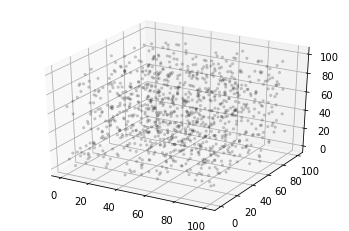

In [147]:
cubo = puntos(1000, l = 100, seed = 500)
verCubo(cubo)

Con estimador simple:

In [94]:
y = correlacion(cubo, cubo, l = 150, n_bins = 15)

999


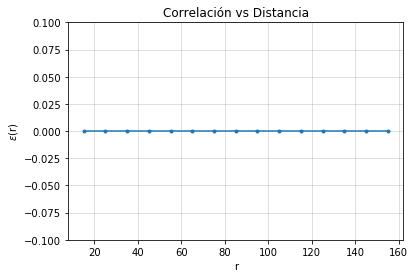

In [95]:
ver_correlacion(y, l = 150, limit = [-0.1, 0.1])

Con estimador de Landy-Szalay

In [105]:
y_LS = long_correlacion_LS(cubo, cubo, l = 150, n_bins = 30)

1
2
3


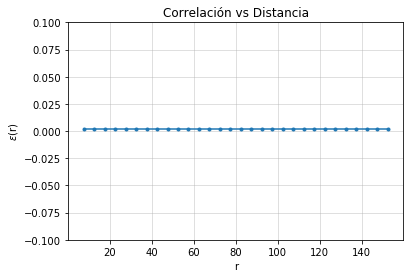

In [106]:
ver_correlacion(y_LS, l = 150, limit = [-0.1, 0.1])

### Con dos cubos diferentes pero aleatorios

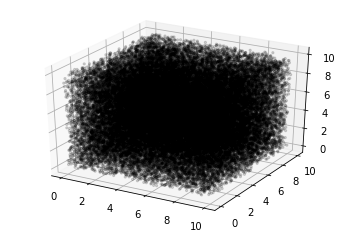

In [334]:
aleatorio1 = puntos(50000, l = 10, seed = 1)
aleatorio2 = puntos(50000, l = 10, seed = 2)
verCubo(aleatorio2)

In [335]:
y_LS = long_correlacion_LS(aleatorio1, aleatorio2, l = 15, n_bins = 100)

1
2
3


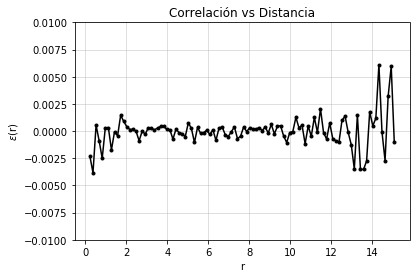

In [336]:
ver_correlacion(y_LS, l = 15, limit = [-0.01, 0.01])

# Datos no aleatorios
## Con 20k

In [11]:
#Cargamos los datos de prueba

datos = np.load('prueba_20k.npy')

Text(0.5, 1.0, 'Proyección 2D de los datos')

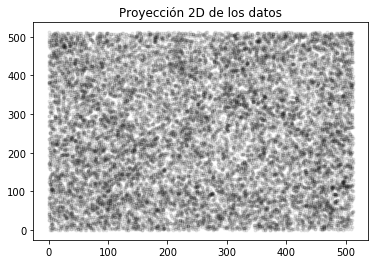

In [12]:
#Proyectamos en 2D para identificar estructuras

fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(datos.T[0], datos.T[1], alpha = 0.08, marker = '.', color = 'black')
ax1.set_title('Proyección 2D de los datos')

In [13]:
aleatorio = puntos(20000, l = 512, seed = 1)

In [14]:
y_LS = long_correlacion_LS(datos, aleatorio, l = 120, n_bins = 30)

1
2
3


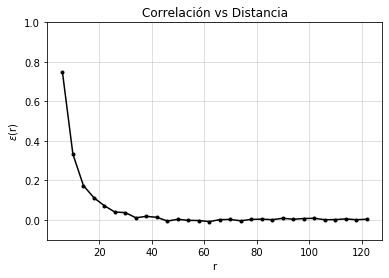

In [15]:
ver_correlacion(y_LS, l = 120, limit = [-0.1, 1])

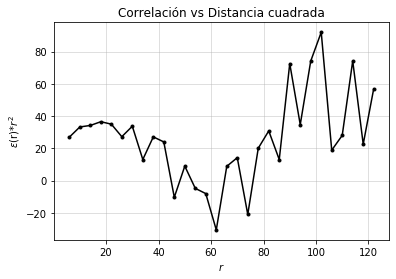

In [16]:
ver_r_cuadrada(y_LS, l = 120)

## Con 50k

In [196]:
#Cargamos los datos de prueba

datos = np.load('prueba_50k.npy')

Text(0.5, 1.0, 'Proyección 2D de los datos')

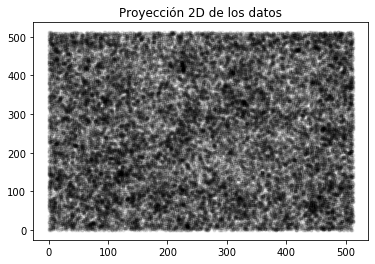

In [197]:
#Proyectamos en 2D para identificar estructuras

fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(datos.T[0], datos.T[1], alpha = 0.08, marker = '.', color = 'black')
ax1.set_title('Proyección 2D de los datos')

In [198]:
aleatorio = puntos(50000, l = 512, seed = 1)

In [199]:
y_LS = long_correlacion_LS(datos, aleatorio, l = 120, n_bins = 60)

1
2
3


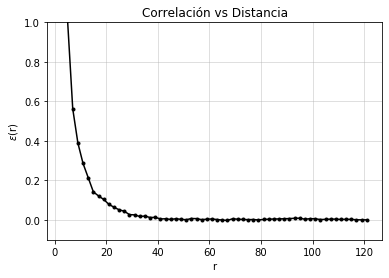

In [200]:
ver_correlacion(y_LS, l = 120, limit = [-0.1, 1])

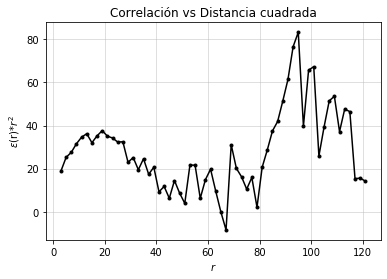

In [203]:
ver_r_cuadrada(y_LS, l = 120)

## Con 250K

In [321]:
datos = np.load('prueba_250k.npy')

In [322]:
n = len(datos)

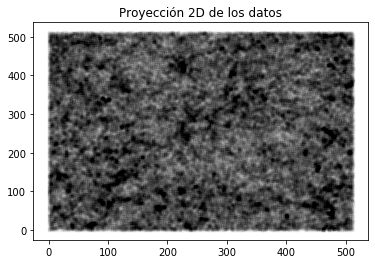

In [323]:
#Proyectamos en 2D para identificar estructuras

fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(datos.T[0], datos.T[1], alpha = 0.01, marker = '.', color = 'black')
ax1.set_title('Proyección 2D de los datos')

plt.show()

In [324]:
aleatorio = puntos(n, l = 512, seed = 1)

In [325]:
y_LS = long_correlacion_LS(datos, aleatorio, l = 130, n_bins = 35)

1
2
3


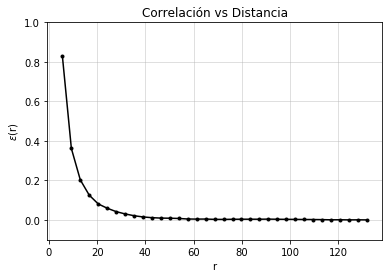

In [328]:
ver_correlacion(y_LS, l = 130, limit = [-0.1, 1])

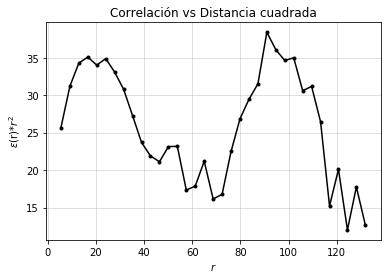

In [329]:
ver_r_cuadrada(y_LS, l = 130)

In [330]:
#Guardo para futuras consultas

#np.save('caso250K_L130_B35.npy', y_LS)

In [331]:
print(y_LS)

[8.27521084e-01 3.61967748e-01 2.02900979e-01 1.25573610e-01
 8.14865923e-02 5.98364018e-02 4.26158069e-02 3.08800955e-02
 2.18985780e-02 1.55794946e-02 1.19988110e-02 9.79689411e-03
 9.20338514e-03 7.98979466e-03 5.23318285e-03 4.75648714e-03
 5.01487334e-03 3.42053345e-03 3.19673077e-03 3.87900356e-03
 4.21086402e-03 4.21648728e-03 4.13565029e-03 4.63648367e-03
 4.02137399e-03 3.57407405e-03 3.35330323e-03 2.73080417e-03
 2.59580207e-03 2.06112959e-03 1.11198676e-03 1.37973912e-03
 7.76630919e-04 1.08134205e-03 7.29237275e-04]


In [333]:
checar = np.load('caso250K_L130_B35.npy')
print(checar)

[8.27521084e-01 3.61967748e-01 2.02900979e-01 1.25573610e-01
 8.14865923e-02 5.98364018e-02 4.26158069e-02 3.08800955e-02
 2.18985780e-02 1.55794946e-02 1.19988110e-02 9.79689411e-03
 9.20338514e-03 7.98979466e-03 5.23318285e-03 4.75648714e-03
 5.01487334e-03 3.42053345e-03 3.19673077e-03 3.87900356e-03
 4.21086402e-03 4.21648728e-03 4.13565029e-03 4.63648367e-03
 4.02137399e-03 3.57407405e-03 3.35330323e-03 2.73080417e-03
 2.59580207e-03 2.06112959e-03 1.11198676e-03 1.37973912e-03
 7.76630919e-04 1.08134205e-03 7.29237275e-04]
